In [11]:
import ae
import tensorflow as tf
import os
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from audioop import rms
from matplotlib.pyplot import ylabel

In [21]:
def testset(test_path, model, dmg=False):
    ae_test = ae.autoEncoder()
    data = []
    names = []
    imgHeight = 48
    imgWidth = 48
    imgChannel = 3
    img_shape = (imgHeight, imgWidth, imgChannel)
    ts_db = os.path.join(test_path)
    for img in os.listdir(ts_db):
        image = Image.open(os.path.join(ts_db, img)).convert('RGB')
        image = image.resize((imgHeight,imgWidth))
        image = np.array(image)
        image = image/255.0
        data.append(image)
        if dmg:
            names.append(img)
    test_data = np.array(data)
    gen = model.predict(test_data)
    tensor_test = tf.convert_to_tensor(test_data, dtype=tf.float32)
    ssim_vals = []
    psnr_vals = []
    rmse_vals = []
    mre_vals = []
    for i in range(len(test_data)):
        ssim_val = ae_test.compMetric(tensor_test[i], gen[i], "SSIM")
        psnr_val = ae_test.compMetric(tensor_test[i], gen[i], "PSNR")
        rmse_val = ae_test.compMetric(tensor_test[i], gen[i], "RMSE")
        mre_val = ae_test.compMetric(tensor_test[i], gen[i], "MRE")

        ssim_vals.append(ssim_val)
        psnr_vals.append(psnr_val/255.0)
        rmse_vals.append(rmse_val)
        mre_vals.append(mre_val)

        if dmg:
            print('Image',names[i],'ssim: ',float(ssim_val),' psnr: ', float(psnr_val/255.0), ' rmse: ', float(rmse_val), ' mre: ', mre_val)

    if dmg == False:
        print("#Instances: ", len(ssim_vals))
    return ssim_vals, psnr_vals, rmse_vals, mre_vals

def visualize(ssim_vals, psnr_vals, rmse_vals, mre_vals, sign):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Image Comparison Metrics Distributions of Sign '+sign)


    ax = sns.distplot(ssim_vals, hist=True, kde=True, ax=axes[0,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'SSIM Distance', ylabel = "#Instances")


    ax = sns.distplot(psnr_vals, hist=True, kde=True, ax=axes[0,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'PSNR Distance', ylabel = "#Instances")

    ax = sns.distplot(rmse_vals, hist=True, kde=True, ax=axes[1,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'RMSE Distance', ylabel = "#Instances")

    ax = sns.distplot(mre_vals, hist=True, kde=True, ax=axes[1,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'MRE Distance', ylabel = "#Instances")



In [22]:
weight_file_cropped_all = "/home/can/thesis/ae_weights/cropped_allfullmodel1mse.h5"
ae_cropped_all = ae.autoEncoder()
model_cropped_all= ae_cropped_all.loadModel(weight_file_cropped_all)

test_path1 = "/home/can/thesis/gtsrb/damaged_signs/1/healthy/"
test_path9 = "/home/can/thesis/gtsrb/damaged_signs/9/healthy/"
test_path14 = "/home/can/thesis/gtsrb/damaged_signs/14/healthy/"
test_path17 = "/home/can/thesis/gtsrb/damaged_signs/17/healthy/"
test_path25 = "/home/can/thesis/gtsrb/damaged_signs/25/healthy/"
test_path39 = "/home/can/thesis/gtsrb/damaged_signs/39/healthy/"

test_path1_dmg = "/home/can/thesis/gtsrb/damaged_signs/1/dmg/"
test_path9_dmg = "/home/can/thesis/gtsrb/damaged_signs/9/dmg/"
test_path14_dmg = "/home/can/thesis/gtsrb/damaged_signs/14/dmg/"
test_path17_dmg = "/home/can/thesis/gtsrb/damaged_signs/17/dmg/"
test_path25_dmg = "/home/can/thesis/gtsrb/damaged_signs/25/dmg/"
test_path39_dmg = "/home/can/thesis/gtsrb/damaged_signs/39/dmg/"

Destructor called, Employee deleted.


23/23 [==============================] - 0s 3ms/step
#Instances:  720
Destructor called, Employee deleted.
1/1 [==============================] - 0s 16ms/step


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

Image 5.png ssim:  0.5771466195583344  psnr:  0.24524943033854166  rmse:  0.1903749257326126  mre:  1.0237849
Image 0.png ssim:  0.5012860298156738  psnr:  0.23785530539119945  rmse:  0.23652926087379456  mre:  1.1281637
Image 4.png ssim:  0.258622944355011  psnr:  0.2690205592735141  rmse:  0.09473884105682373  mre:  0.20862392
Image 3.png ssim:  0.5209457576274872  psnr:  0.2541022207222733  rmse:  0.14680355787277222  mre:  0.47912174
Image 1.png ssim:  0.35847967863082886  psnr:  0.2577708225624234  rmse:  0.13181418180465698  mre:  0.23352185
Image 6.png ssim:  0.4064818024635315  psnr:  0.25892851586435356  rmse:  0.1274094432592392  mre:  0.28366667
Image 2.png ssim:  0.6280194818973541  psnr:  0.2516070197610294  rmse:  0.1579611599445343  mre:  0.58222127
Destructor called, Employee deleted.


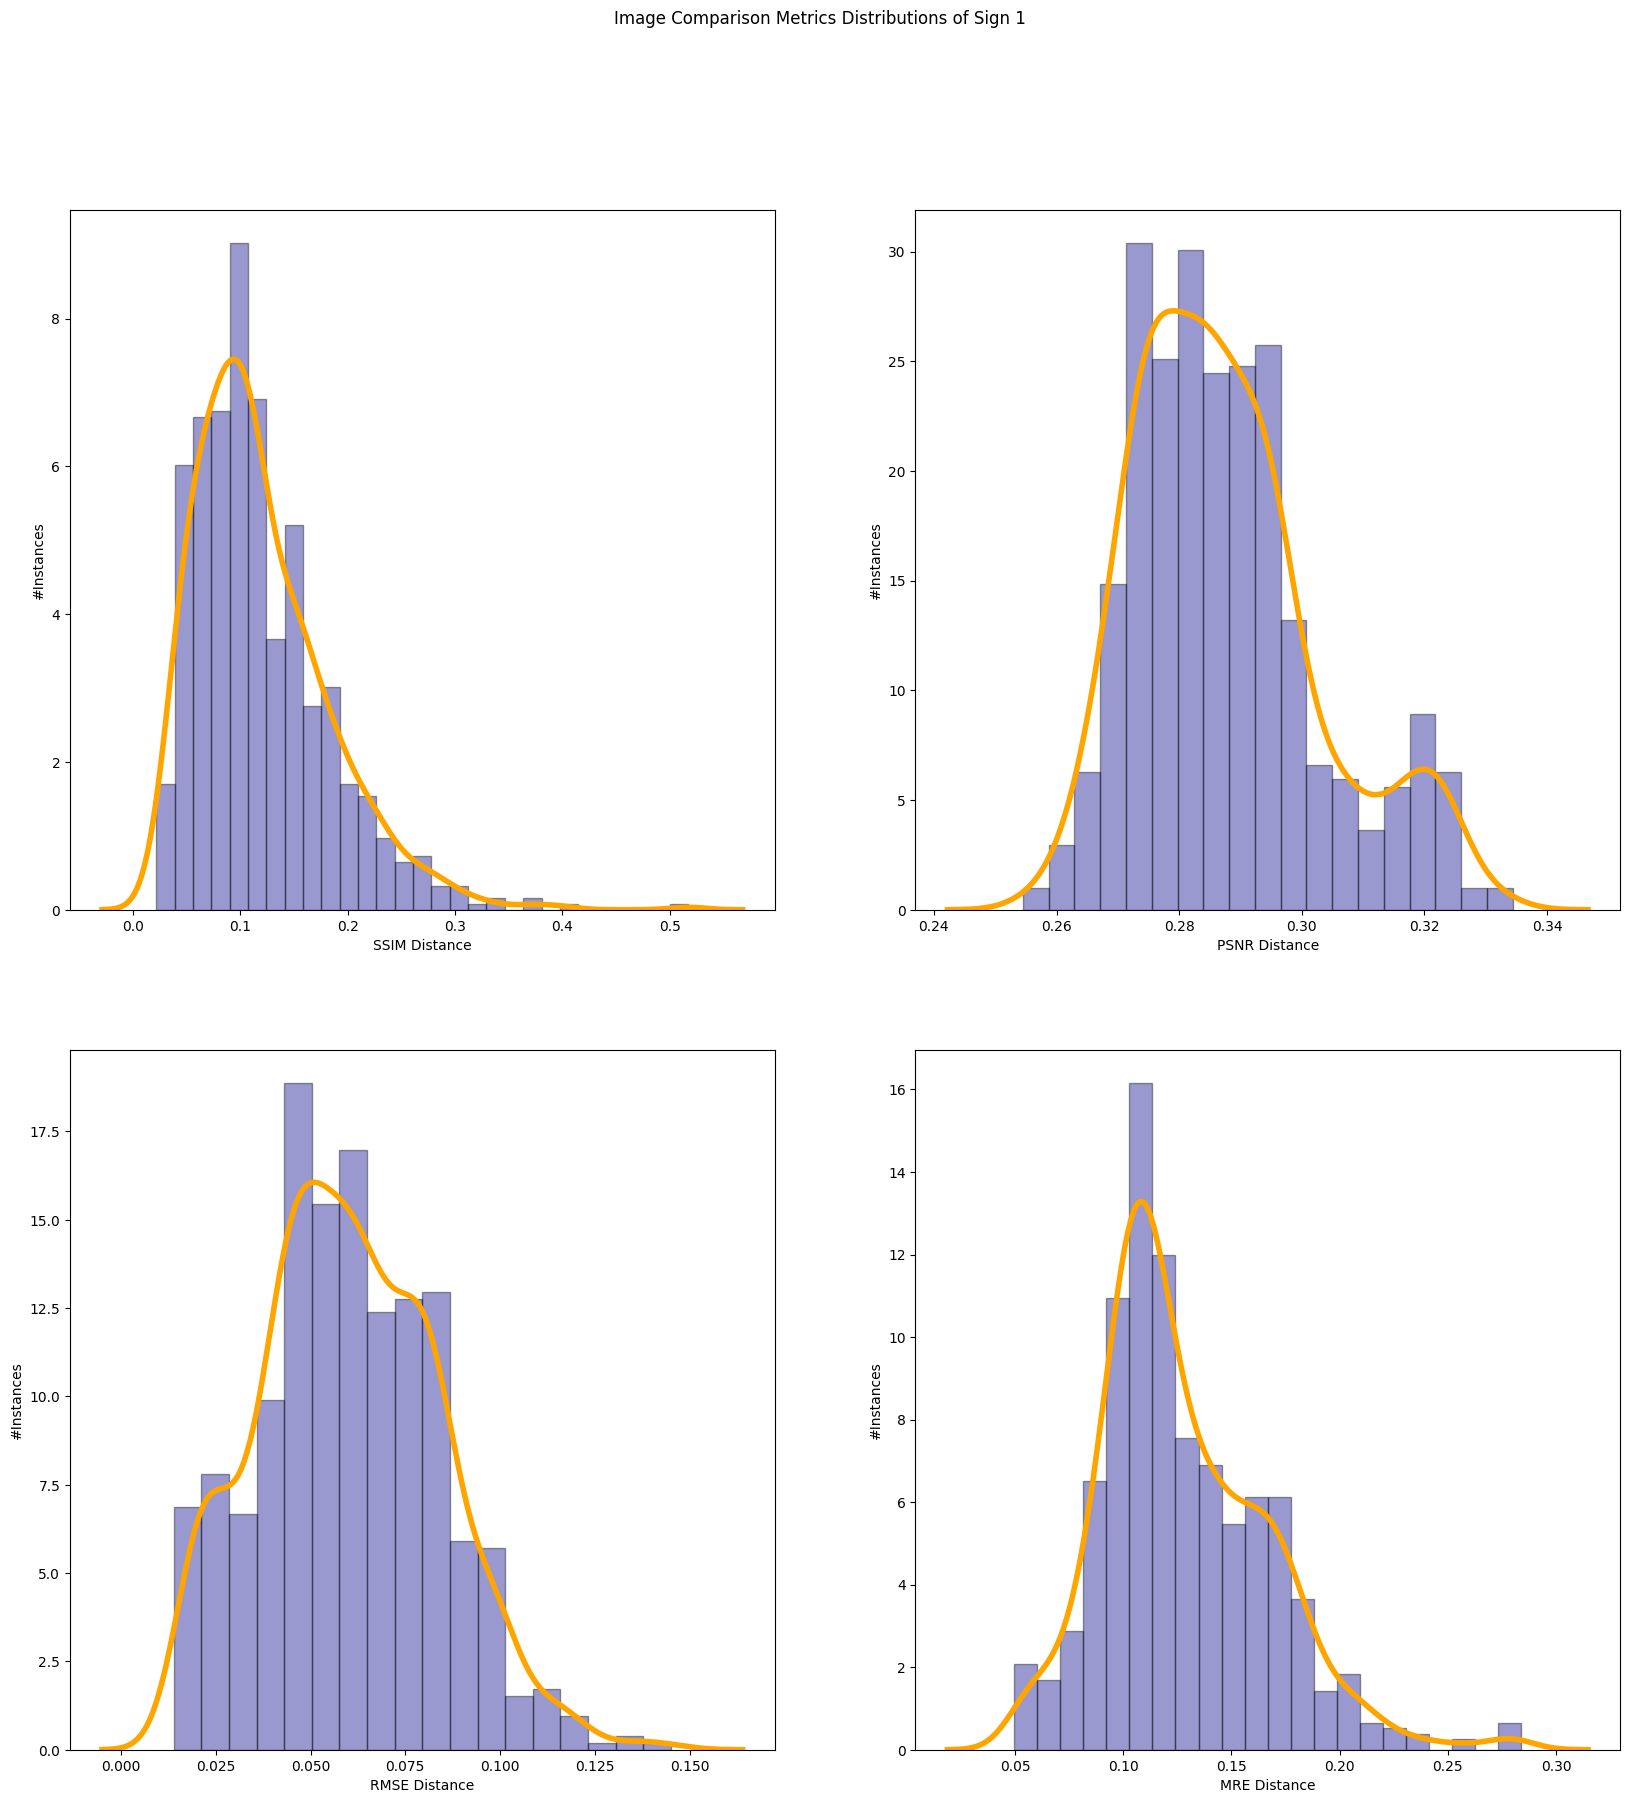

In [23]:
ssim1, psnr1, rmse1, mre1 = testset(test_path1, model_cropped_all)
visualize(ssim1, psnr1, rmse1, mre1, "1")
_,_,_,_ = testset(test_path1_dmg, model_cropped_all,True)


15/15 [==============================] - 0s 3ms/step
#Instances:  480
Destructor called, Employee deleted.


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

1/1 [==============================] - 0s 70ms/step
Image 0.png ssim:  0.4873034358024597  psnr:  0.25531735887714463  rmse:  0.14165879786014557  mre:  0.30653304
Image 1.png ssim:  0.627675861120224  psnr:  0.25450906192555145  rmse:  0.14506062865257263  mre:  0.48034886
Image 2.png ssim:  0.547161191701889  psnr:  0.24992479810527726  rmse:  0.1659582406282425  mre:  0.4543467
Destructor called, Employee deleted.


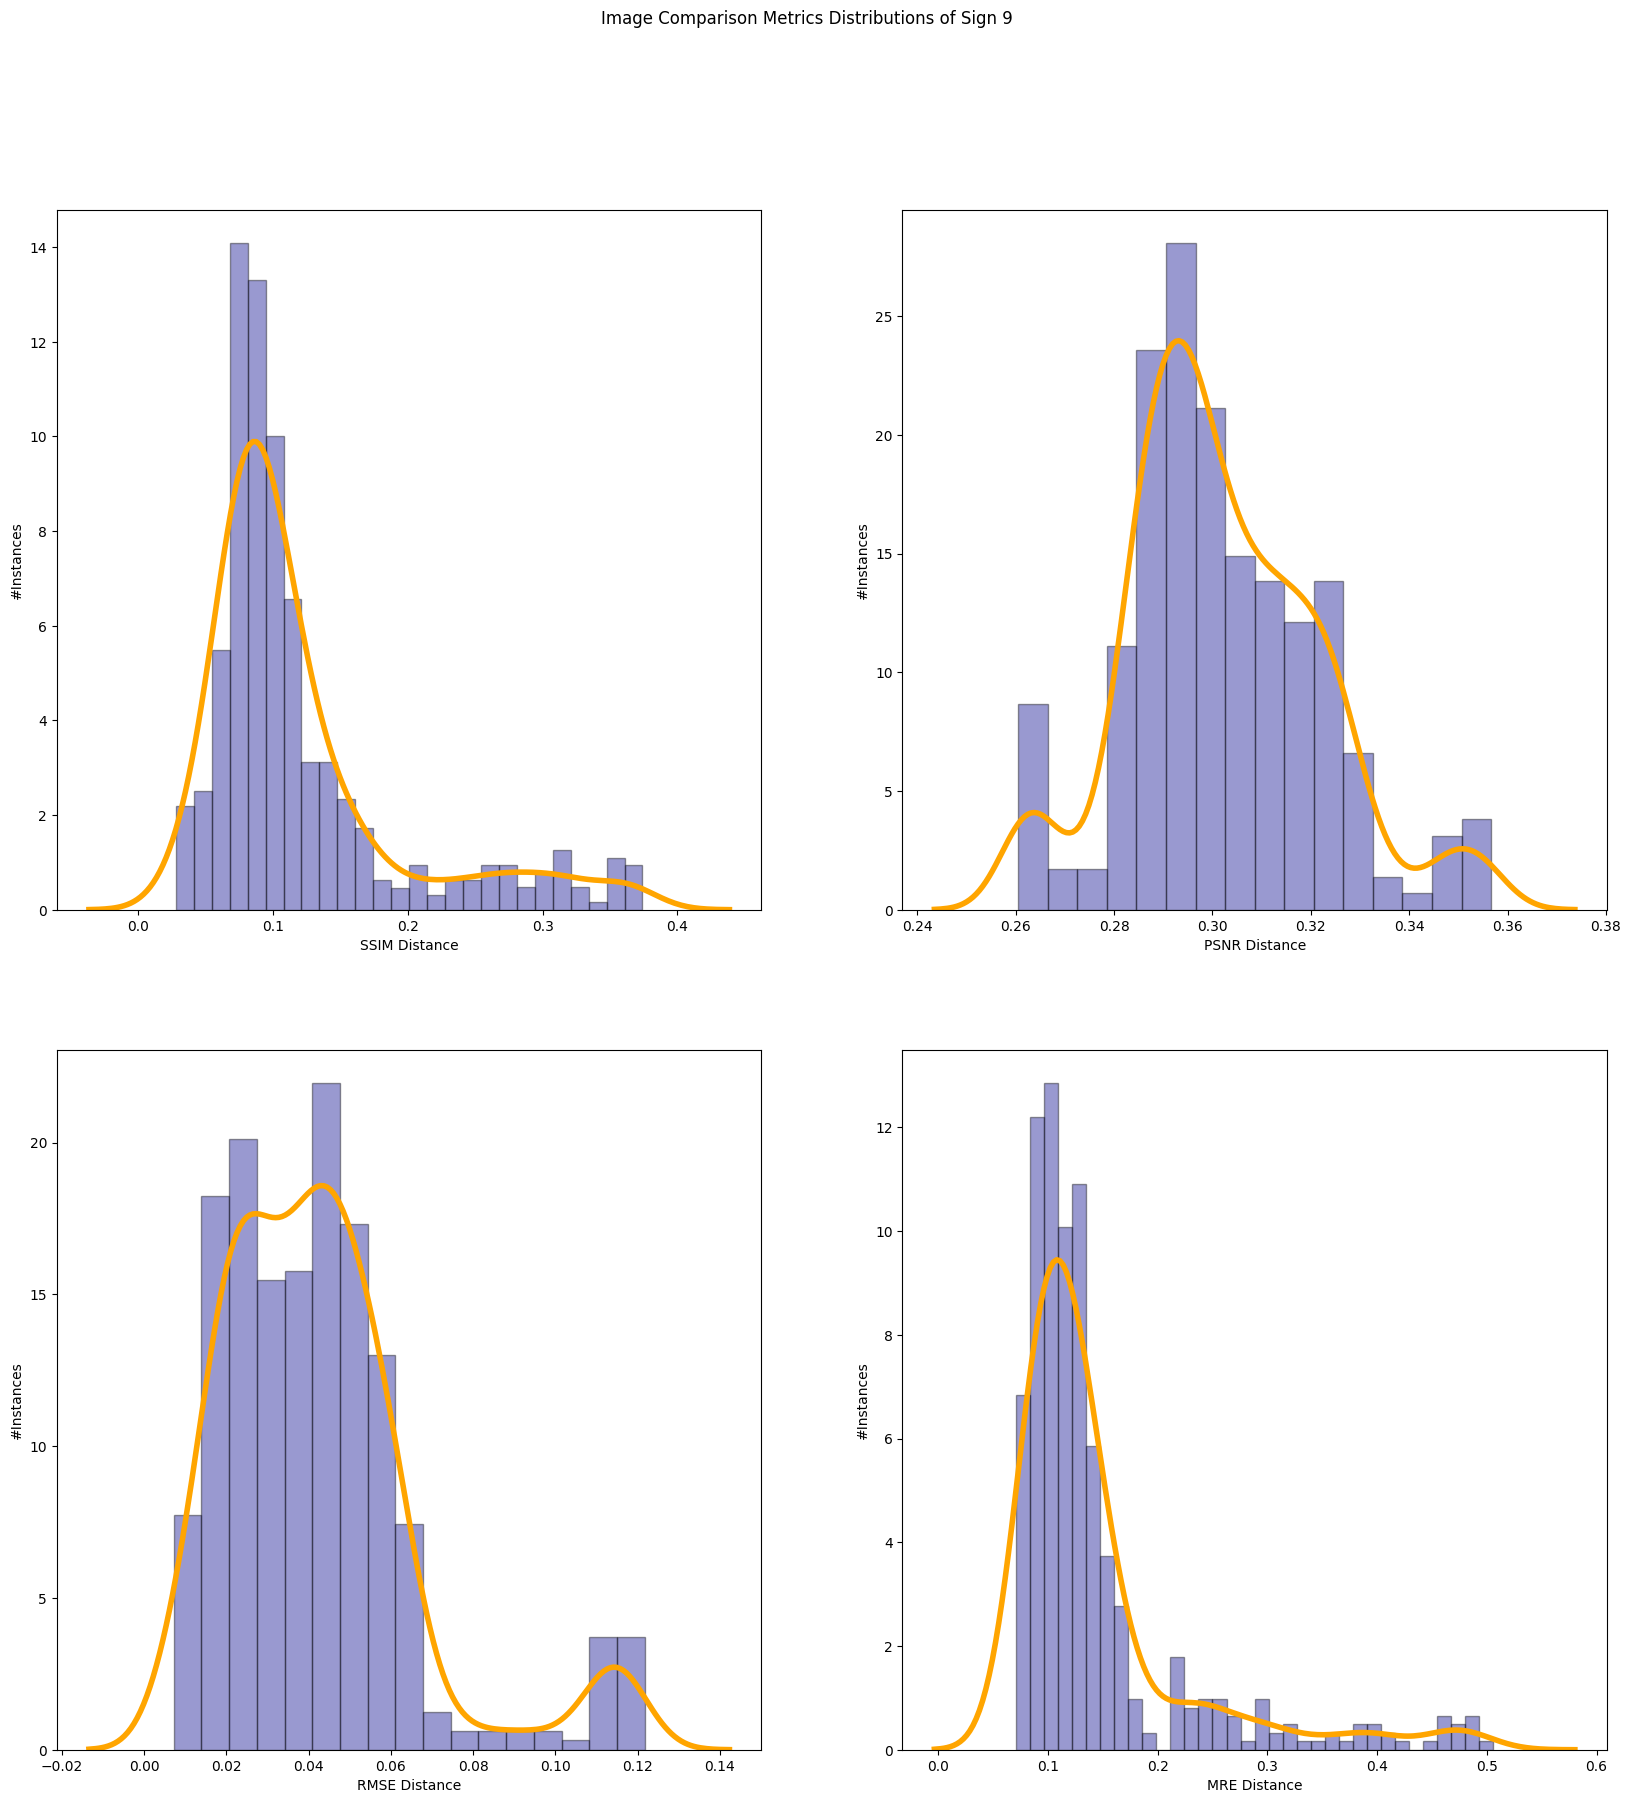

In [24]:
ssim9, psnr9, rmse9, mre9 = testset(test_path9, model_cropped_all)
visualize(ssim9, psnr9, rmse9, mre9,"9")
_,_,_,_ = testset(test_path9_dmg, model_cropped_all,True)

9/9 [==============================] - 0s 3ms/step
#Instances:  270
Destructor called, Employee deleted.


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

1/1 [==============================] - 0s 74ms/step
Image 11.png ssim:  0.4916560649871826  psnr:  0.265247330011106  rmse:  0.10583677887916565  mre:  0.17772621
Image 5.png ssim:  0.33677738904953003  psnr:  0.25223215140548405  rmse:  0.15508875250816345  mre:  0.49165648
Image 7.png ssim:  0.39451056718826294  psnr:  0.259244582232307  rmse:  0.12623268365859985  mre:  0.26215628
Image 0.png ssim:  0.5239906311035156  psnr:  0.2524038576612286  rmse:  0.15430891513824463  mre:  1.4401889
Image 4.png ssim:  0.47746938467025757  psnr:  0.25381451775045955  rmse:  0.1480487883090973  mre:  0.5008242
Image 10.png ssim:  0.6688247621059418  psnr:  0.2436436372644761  rmse:  0.19956471025943756  mre:  0.5544069
Image 3.png ssim:  0.5649440586566925  psnr:  0.25445269416360294  rmse:  0.14530080556869507  mre:  0.18433218
Image 1.png ssim:  0.7675584554672241  psnr:  0.24653721229702819  rmse:  0.18331189453601837  mre:  0.76528543
Image 12.png ssim:  0.6593683958053589  psnr:  0.24597468

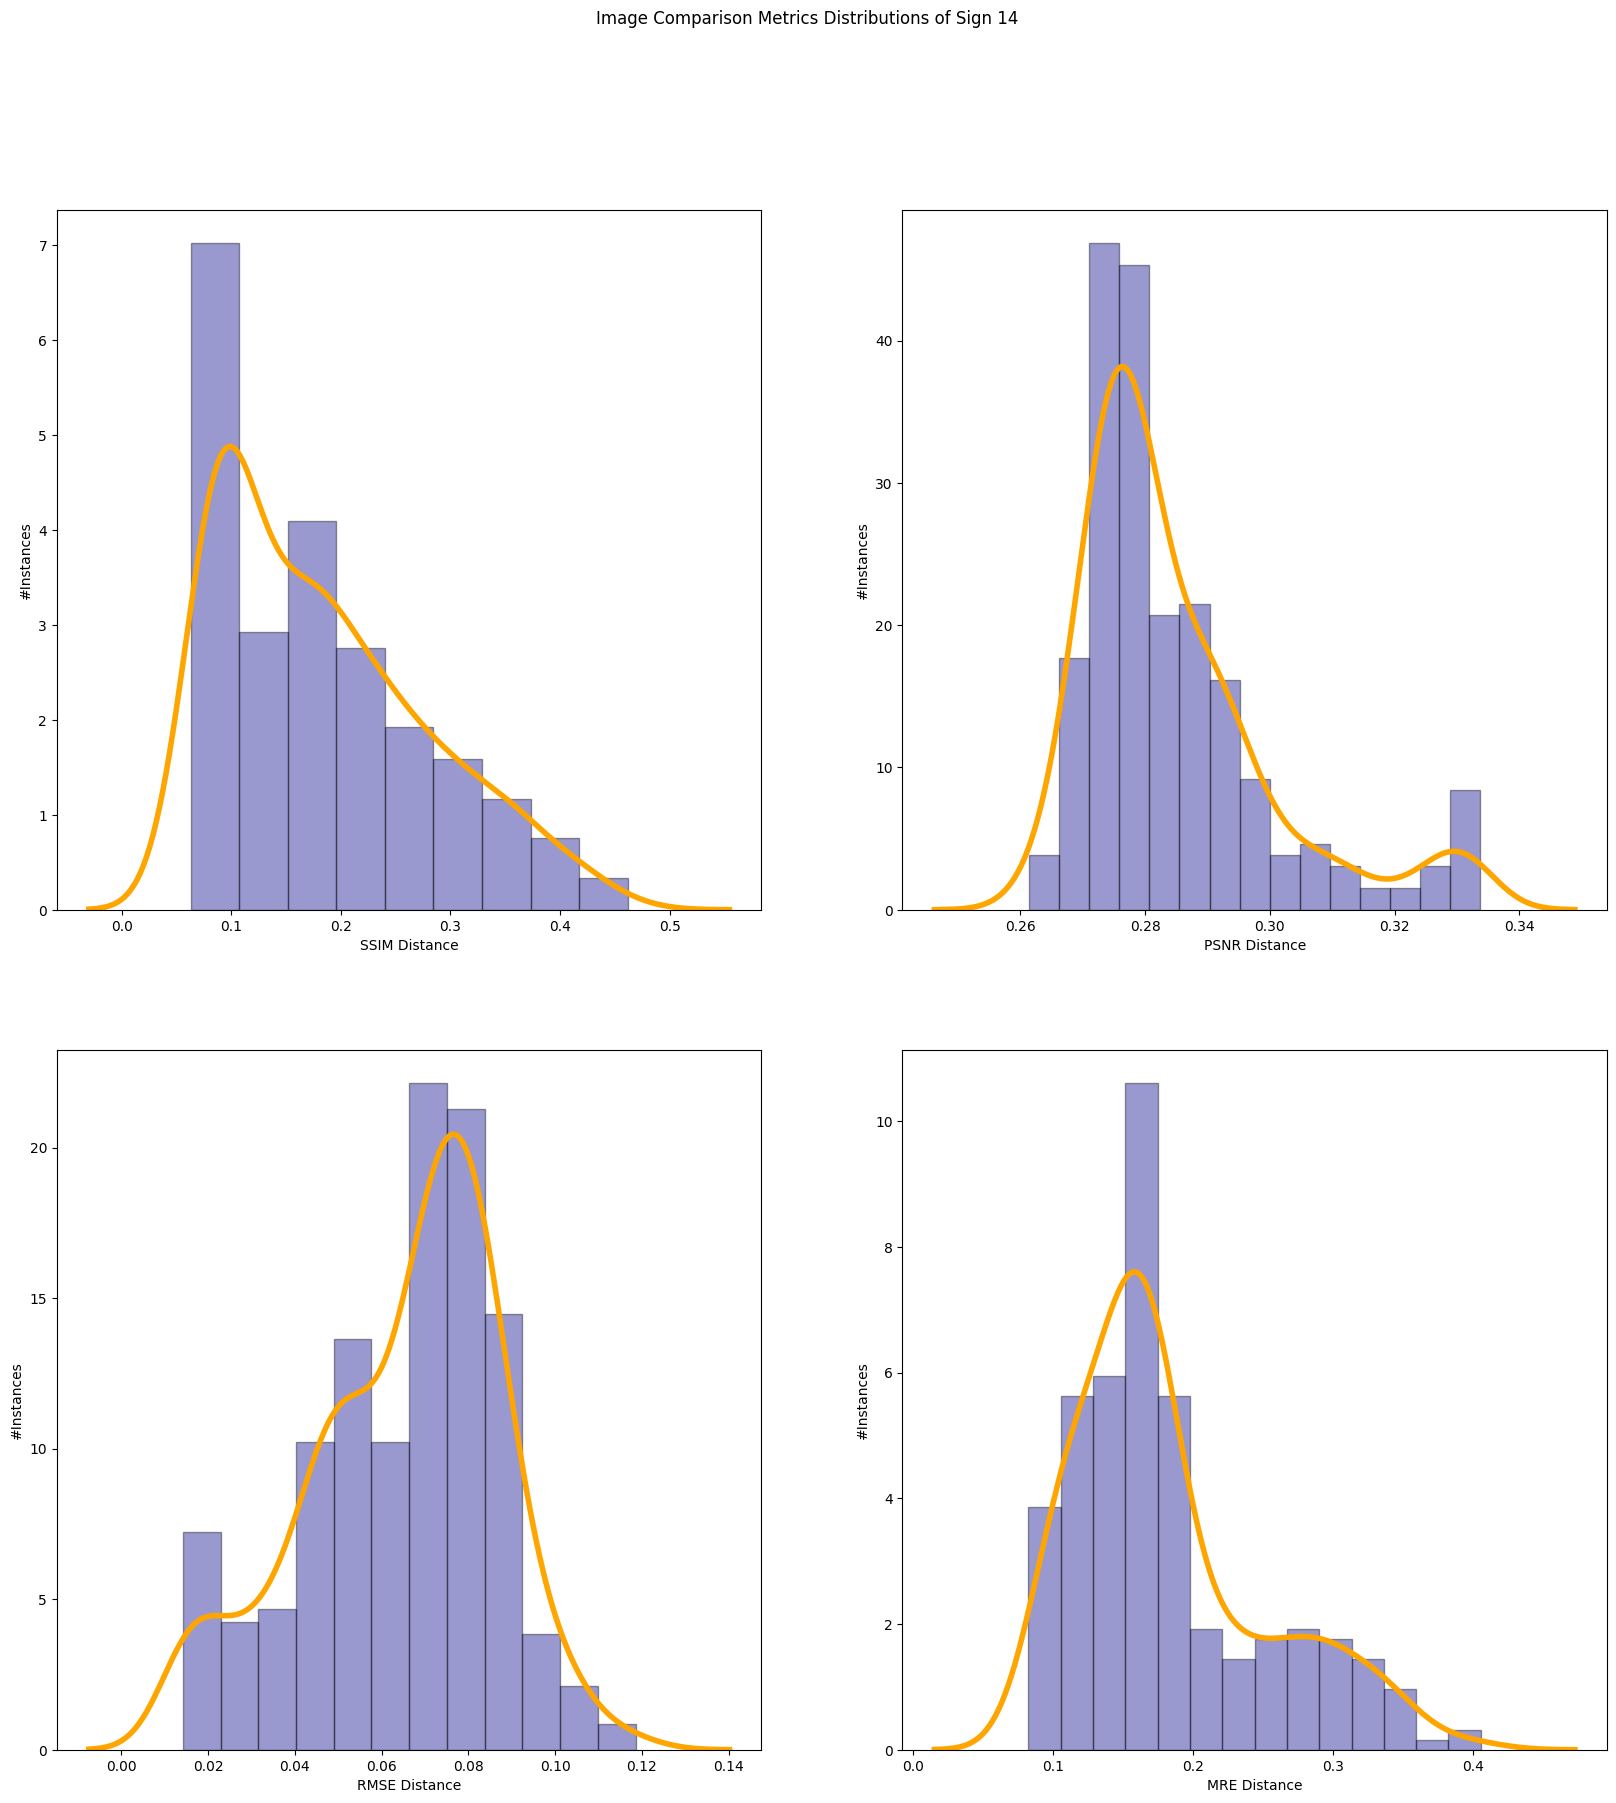

In [25]:
ssim14, psnr14, rmse14, mre14 = testset(test_path14, model_cropped_all)
visualize(ssim14, psnr14, rmse14, mre14,"14")
_,_,_,_ = testset(test_path14_dmg, model_cropped_all,True)

12/12 [==============================] - 0s 3ms/step
#Instances:  360
Destructor called, Employee deleted.


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

1/1 [==============================] - 0s 76ms/step
Image 5.png ssim:  0.42700278759002686  psnr:  0.26590232101141237  rmse:  0.10382106155157089  mre:  0.21217091
Image 7.png ssim:  0.48996418714523315  psnr:  0.2548022101907169  rmse:  0.14381757378578186  mre:  0.62571883
Image 1.jpg ssim:  0.7274129092693329  psnr:  0.24803433885761336  rmse:  0.17542938888072968  mre:  1.117353
Image 4.png ssim:  0.5548277199268341  psnr:  0.2540669459922641  rmse:  0.1469557285308838  mre:  0.43801636
Image 0.jpg ssim:  0.5867275893688202  psnr:  0.2550657683727788  rmse:  0.14270907640457153  mre:  0.38434643
Image 2.jpg ssim:  0.6583283841609955  psnr:  0.249347671807981  rmse:  0.16879408061504364  mre:  0.31672388
Image 3.jpg ssim:  0.49755245447158813  psnr:  0.26832161697686885  rmse:  0.09670284390449524  mre:  0.24470025
Image 6.png ssim:  0.4476693272590637  psnr:  0.26304428998161766  rmse:  0.11290816217660904  mre:  0.3223164
Image 8.png ssim:  0.5727423131465912  psnr:  0.2534352022

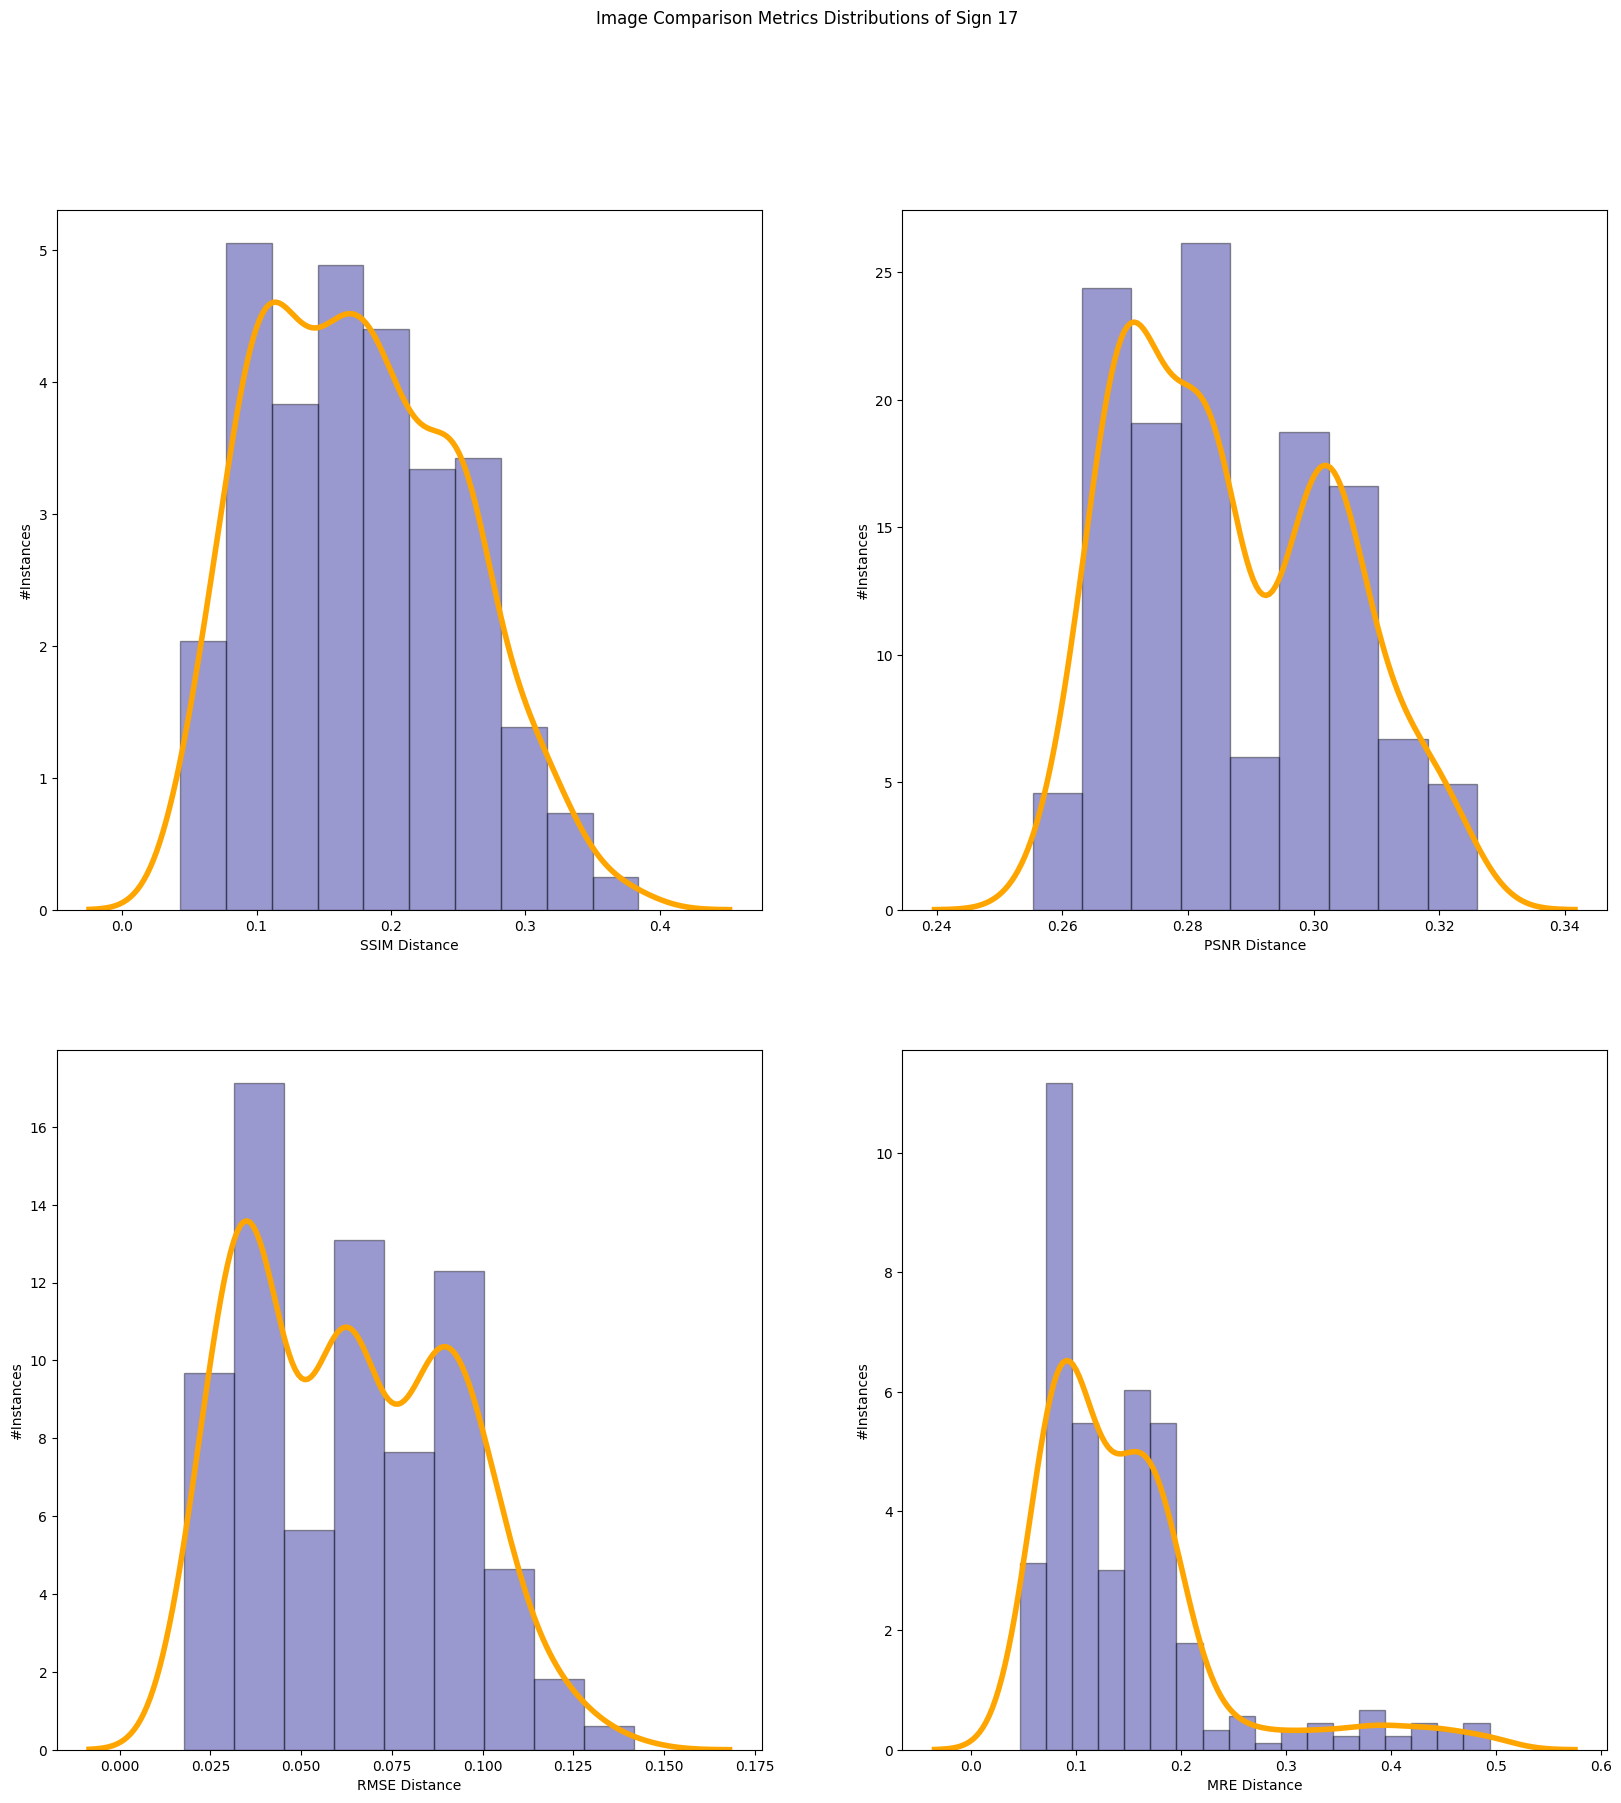

In [26]:
ssim17, psnr17, rmse17, mre17 = testset(test_path17, model_cropped_all)
visualize(ssim17, psnr17, rmse17, mre17,"17")
_,_,_,_ = testset(test_path17_dmg, model_cropped_all,True)

15/15 [==============================] - 0s 4ms/step
#Instances:  480
Destructor called, Employee deleted.


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

1/1 [==============================] - 0s 70ms/step
Image 5.png ssim:  0.7046643197536469  psnr:  0.23978335810642618  rmse:  0.22351272404193878  mre:  2.3034708
Image 7.png ssim:  0.6747779846191406  psnr:  0.2402218687768076  rmse:  0.2206537276506424  mre:  1.3942436
Image 0.png ssim:  0.5618468225002289  psnr:  0.2432819740445006  rmse:  0.20169493556022644  mre:  0.95330673
Image 4.png ssim:  0.5735491216182709  psnr:  0.252787810680913  rmse:  0.1525791883468628  mre:  0.31315938
Image 3.png ssim:  0.5936383903026581  psnr:  0.25049383126053154  rmse:  0.16320884227752686  mre:  0.2731108
Image 1.png ssim:  0.6870012581348419  psnr:  0.25950484930300244  rmse:  0.12527181208133698  mre:  0.27798378
Image 00008.png ssim:  0.2742069363594055  psnr:  0.26758620318244486  rmse:  0.09881343692541122  mre:  0.17840065
Image 9.png ssim:  0.7856846004724503  psnr:  0.2399781619801241  rmse:  0.22223812341690063  mre:  1.1195139
Image 6.png ssim:  0.7482538223266602  psnr:  0.24837858910

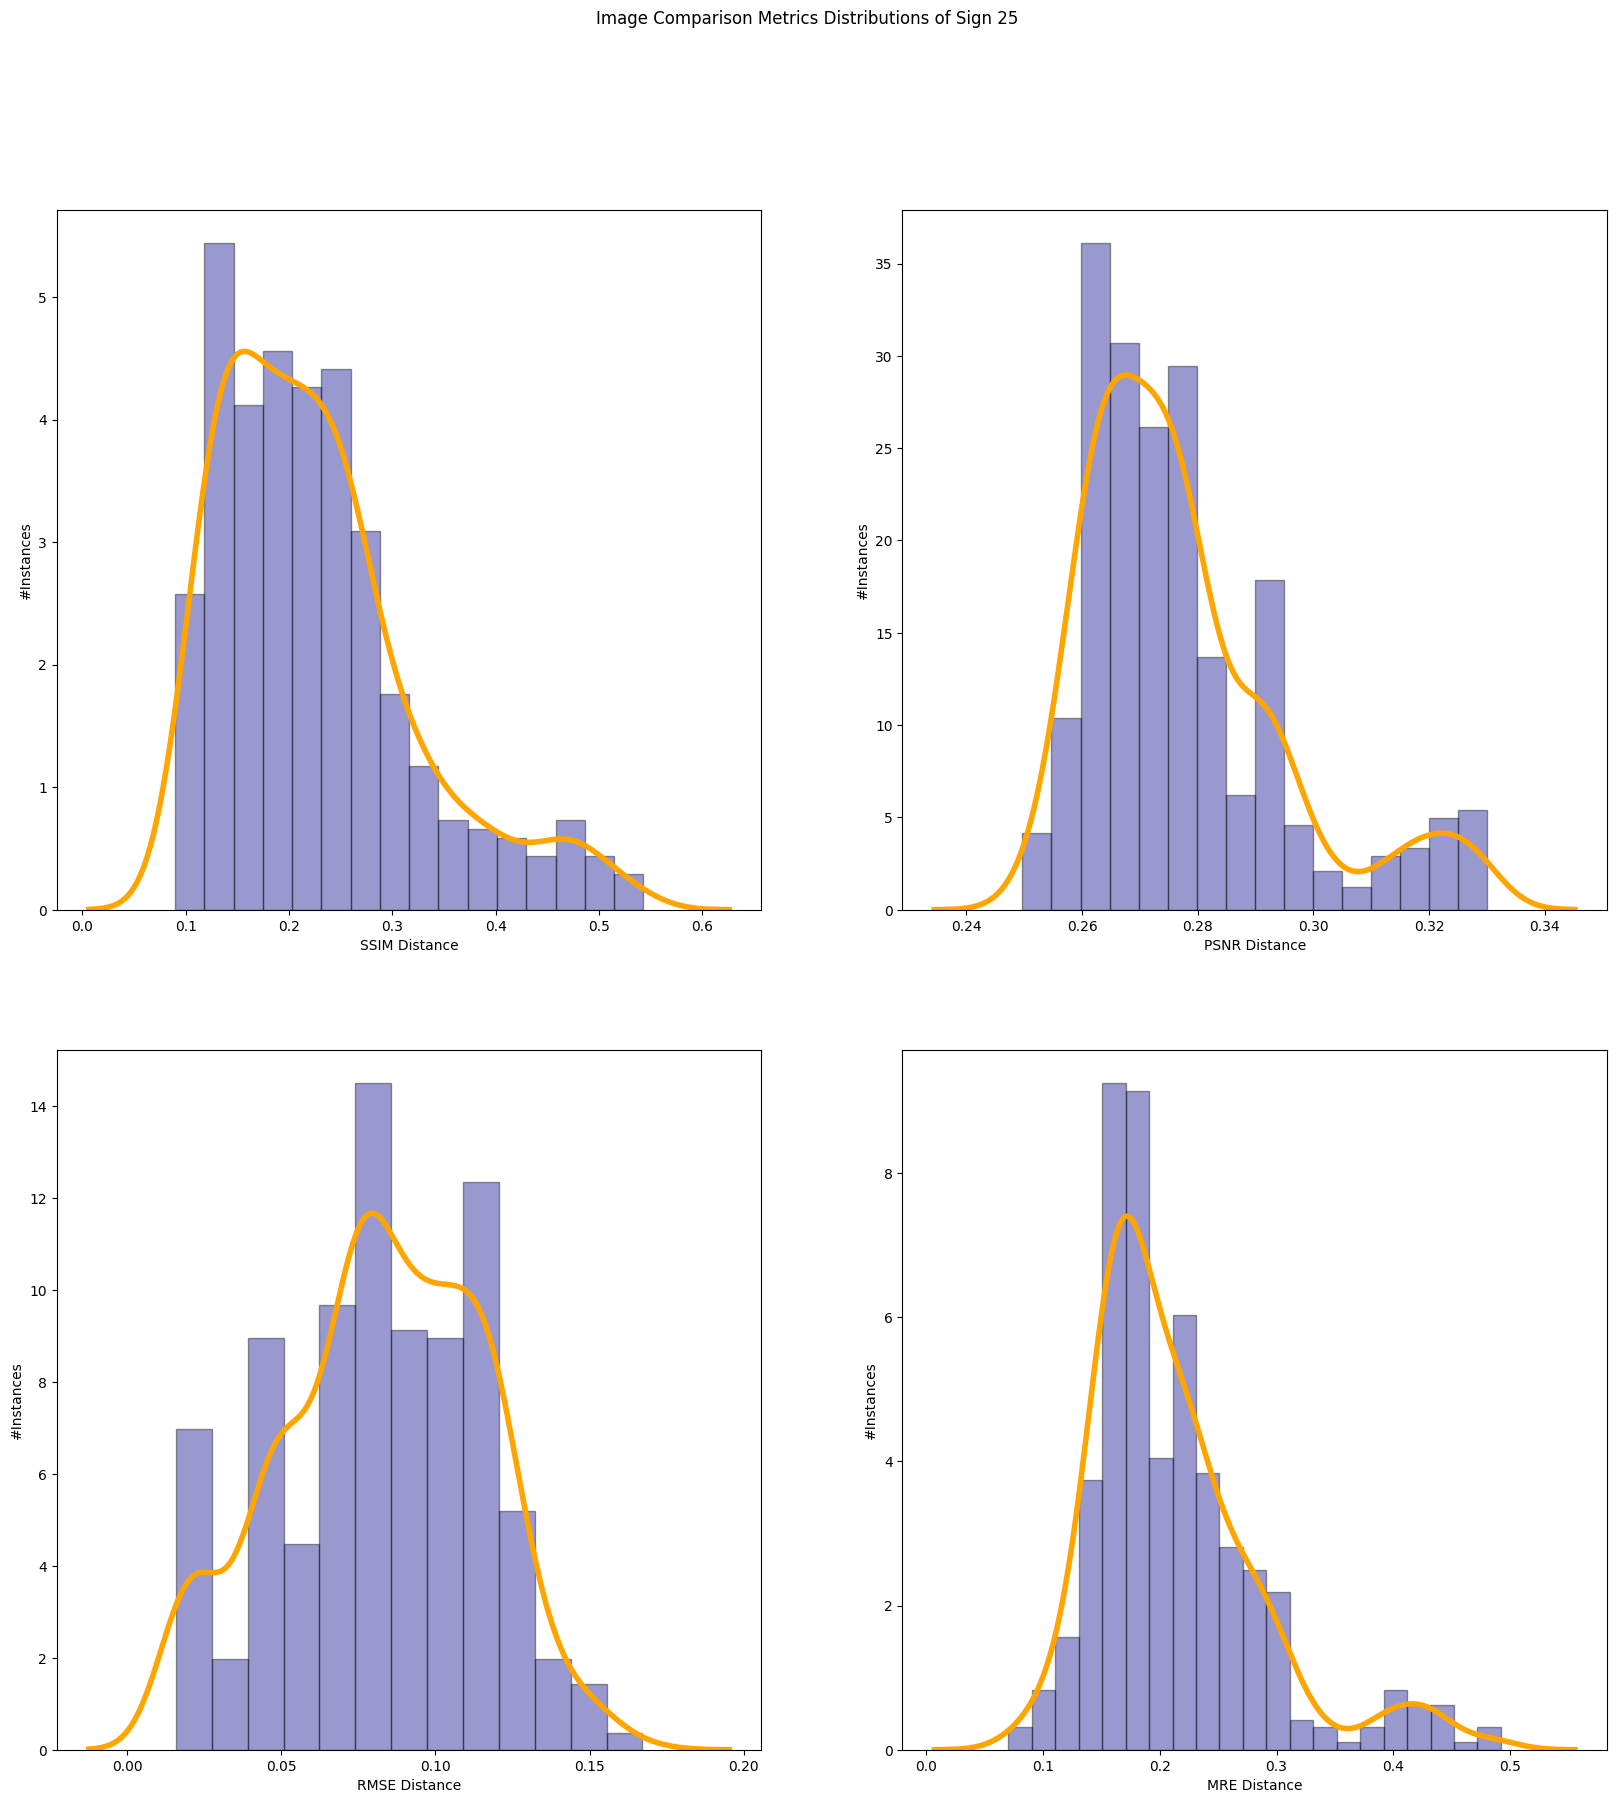

In [27]:
ssim25, psnr25, rmse25, mre25 = testset(test_path25, model_cropped_all)
visualize(ssim25, psnr25, rmse25, mre25,"25")
_,_,_,_ = testset(test_path25_dmg, model_cropped_all,True)

3/3 [==============================] - 0s 3ms/step
#Instances:  90
Destructor called, Employee deleted.


/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/can/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

1/1 [==============================] - 0s 67ms/step
Image 0.png ssim:  0.5635546147823334  psnr:  0.25611270081763177  rmse:  0.138389453291893  mre:  0.23059484
Image 3.png ssim:  0.6361556053161621  psnr:  0.24410873113893994  rmse:  0.19685830175876617  mre:  1.5228509
Image 1.png ssim:  0.6286792755126953  psnr:  0.24816071753408395  rmse:  0.1747797280550003  mre:  0.3849481
Image 2.png ssim:  0.5456628501415253  psnr:  0.2583131378772212  rmse:  0.12973210215568542  mre:  0.34266087
Destructor called, Employee deleted.


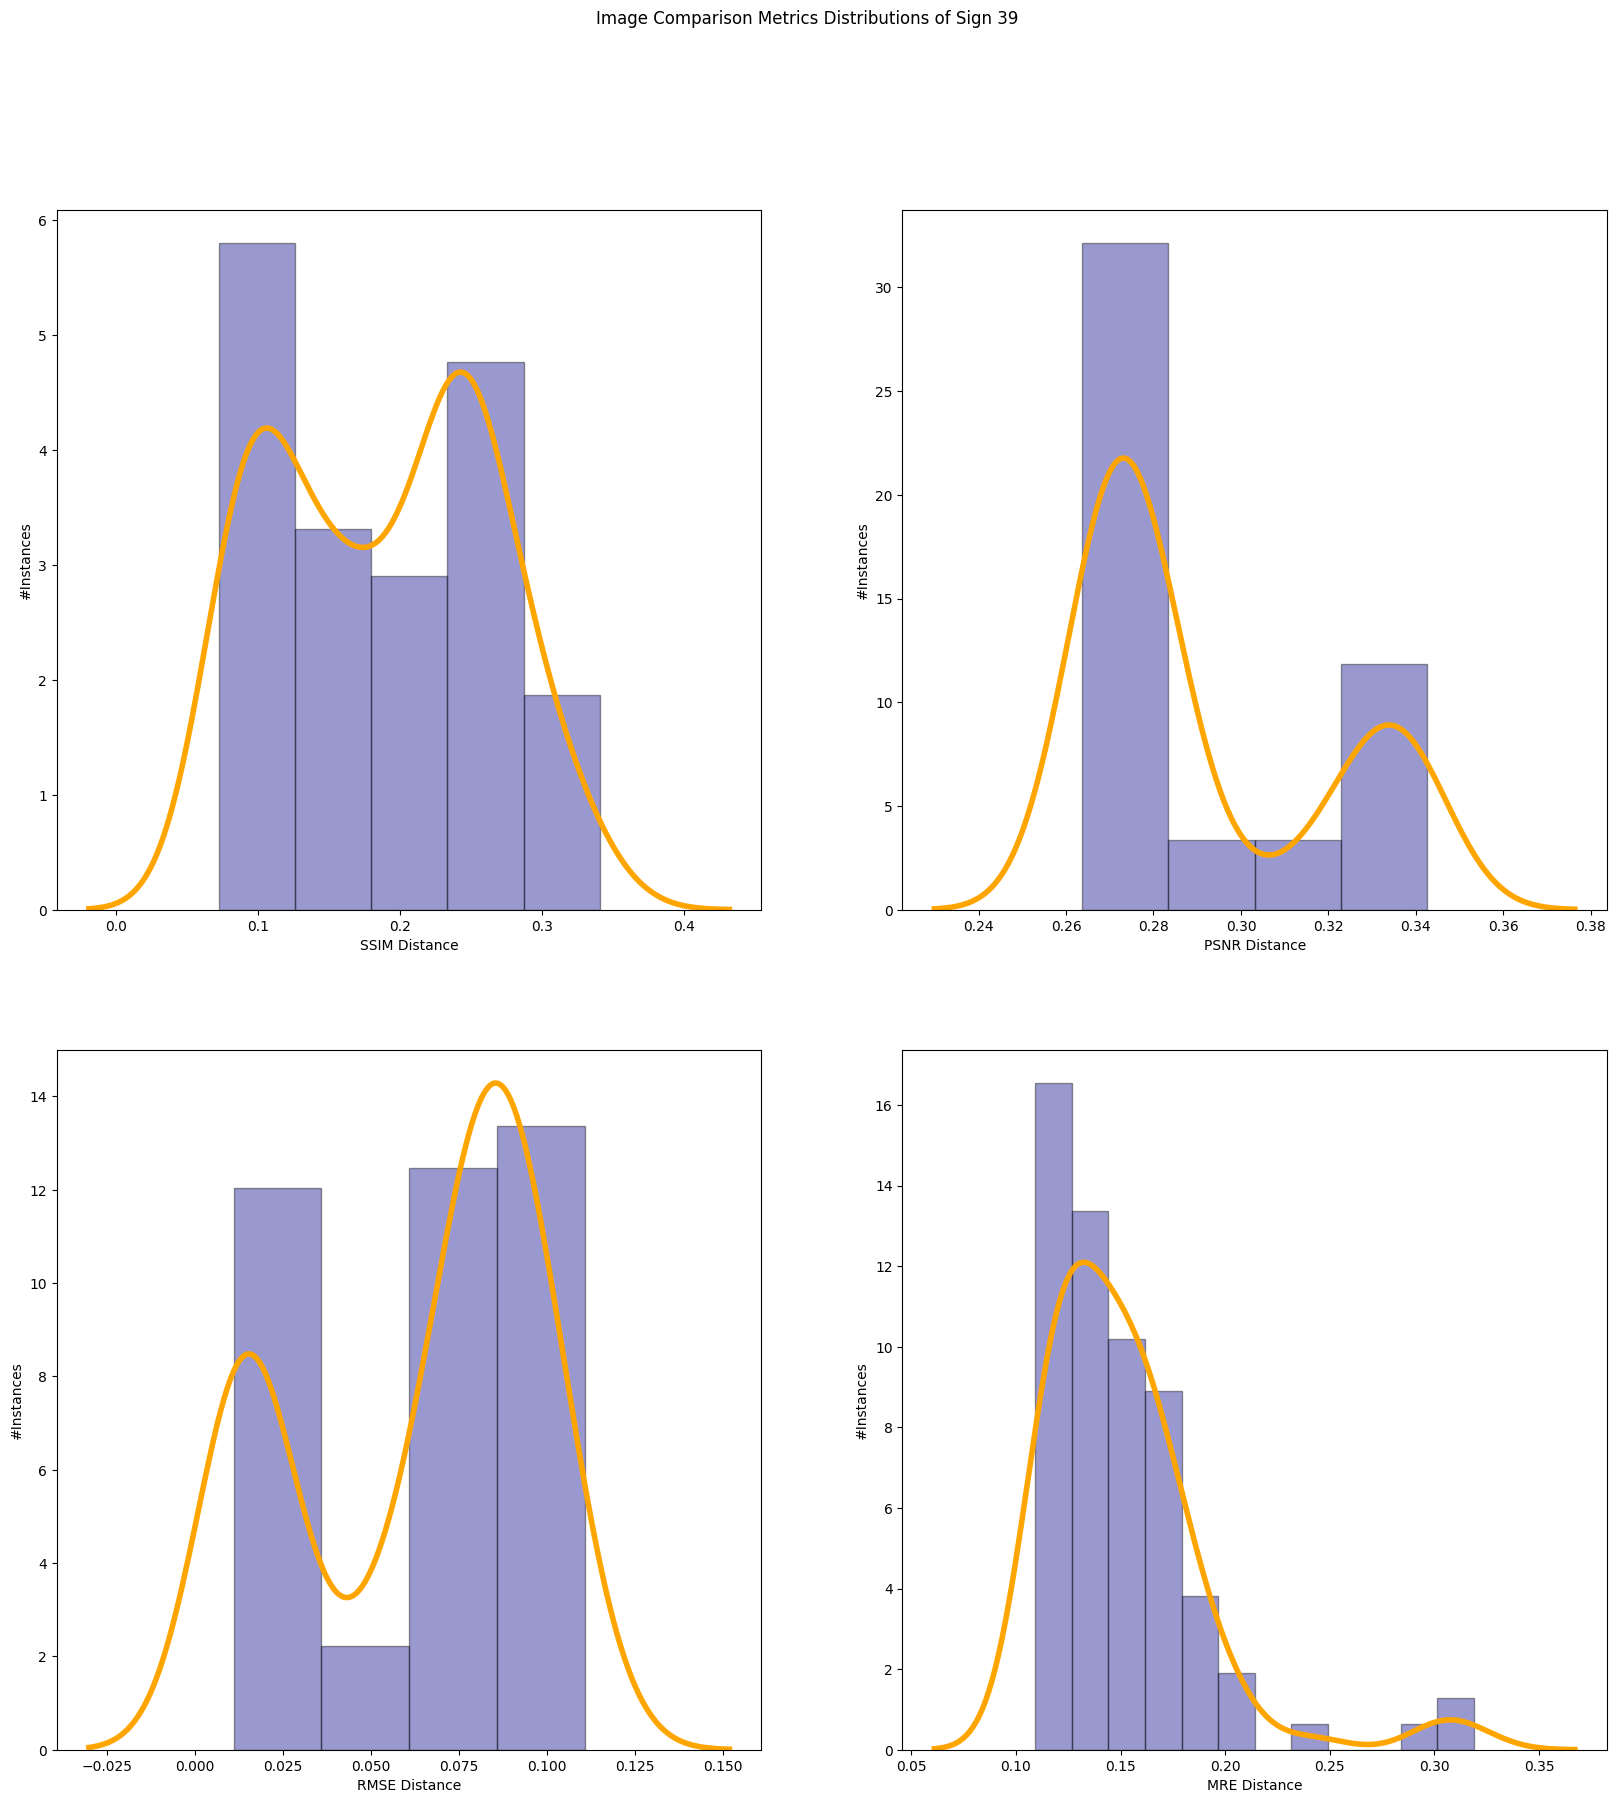

In [28]:
ssim39, psnr39, rmse39, mre39 = testset(test_path39, model_cropped_all)
visualize(ssim39, psnr39, rmse39, mre39,"39")
_,_,_,_ = testset(test_path39_dmg, model_cropped_all,True)